<a href="https://colab.research.google.com/github/TDMVu18/PTDLPython/blob/main/pandas4_T%E1%BB%95ng_h%E1%BB%A3p_c%C3%A1c_thao_t%C3%A1c_th%E1%BB%91ng_k%C3%AA_m%C3%B4_t%E1%BA%A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Câu 1: Xác định các thư viện cần dùng cho quá trình phân tích thống kê mô tả và đưa vào mã lệnh
(sử dụng Google Colab)

In [ ]:
import pandas as pd #thư viện pandas
import matplotlib.pyplot as plt #thư viện matplotlib
import numpy as np #thư viện numpy
import scipy.stats as stats #thư viện scipy
import seaborn as sns #thư viện seaborn 
from matplotlib.ticker import PercentFormatter

Câu 3: Đối với các cột dữ liệu định lượng, hãy áp dụng các phép tính hướng tâm, phép tính phương
sai – độ lệch chuẩn, các phép tính phân vị, cực đại – cực tiểu để tính các thông số cơ bản của các
cột dữ liệu định lượng này.

In [ ]:
data = pd.read_csv('C:/Users/MSI/Downloads/database/database.csv')
data1 = pd.DataFrame(columns = ['Height','Speed'], data = data)

print('Phương sai: ', data1['Height'].var(),";", data1['Speed'].var())
print('Độ lệch chuẩn: ', data1['Height'].std(),";", data1['Speed'].std())
print('Giá trị trung bình: ', data1['Height'].median(),";", data1['Speed'].median())
print('Giá trị lớn nhất: ', data1['Height'].max(),";", data1['Speed'].max())
print('Giá trị nhỏ nhất: ', data1['Height'].min(),";", data1['Speed'].min())

Phương sai:  3253156.327336807 ; 2200.14013779217
Độ lệch chuẩn:  1803.6508329875844 ; 46.905651448329444
Giá trị trung bình:  50.0 ; 138.0
Giá trị lớn nhất:  31300.0 ; 2500.0
Giá trị nhỏ nhất:  0.0 ; 0.0


D:\an\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9,12,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Câu 4: Hãy vẽ biểu đồ boxplot cho từng cột dữ liệu định lượng và xác định xem có xuất hienj các
ngoại lệ không?nếu có thì ở cột nào?

AxesSubplot(0.125,0.125;0.775x0.755)
ở đây sau khi vẽ xong ta thấy cột height xuất hiện hai giá trị ngoại lệ, còn cột speed có một giá trị ngoại lệ


D:\an\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


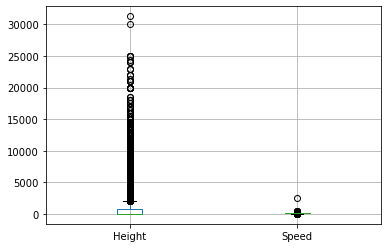

In [ ]:
boxplot = data.boxplot(column = ['Height','Speed'])
print(boxplot)
# plt.hist(data['Height'], bins = 20)
# plt.show()
print('ở đây sau khi vẽ xong ta thấy cột height xuất hiện hai giá trị ngoại lệ, còn cột speed có một giá trị ngoại lệ')

Câu 5: Người ta thường sử dụng chỉ số z (hay z-score) để xác định giá trị ngoại lệ (outlier). Bạn
hãy loại bỏ các hàng có chứa giá trị ngoại lệ ra khỏi dataframe.

Gợi ý: sử dụng chỉ số z hoặc hàm tính phân vị (quantile)

0.0 800.0
(174104, 1)
(174104, 1)
AxesSubplot(0.125,0.125;0.775x0.755)


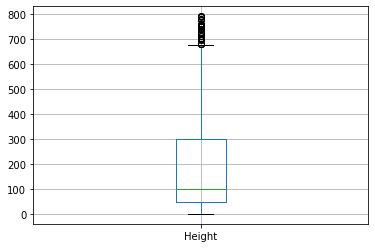

In [ ]:
# find Q1, Q3, and interquartile range for each column
Q1 = data1['Height'].quantile(q=.25)
Q3 = data1['Height'].quantile(q=.75)
print(Q1,Q3)

#tách cột height
data_height = pd.DataFrame(columns = ['Height'], data = data1)
print(data_height.shape)

#cách1: dùng Q1 và Q3 để loại bỏ giá trị ngoại lệ

data_no_outlies1 = data_height[(data_height<Q3) & (data_height>Q1)] 
print(data_no_outlies1.shape)
boxplot = data_no_outlies1.boxplot(column = ['Height'])
print(boxplot)

   Height    zscore
0     NaN       NaN
1     0.0 -0.460750
2     NaN       NaN
3   200.0 -0.349864
4   100.0 -0.405307
         Height    zscore
59      12000.0  6.192422
63      10000.0  5.083560
64      10000.0  5.083560
173     15000.0  7.855715
176     11000.0  5.637991
...         ...       ...
173745   8000.0  3.974698
173767   6700.0  3.253938
173936  11000.0  5.637991
173953  10000.0  5.083560
173994  14000.0  7.301284

[2539 rows x 2 columns]
        Height    zscore
1          0.0 -0.460750
3        200.0 -0.349864
4        100.0 -0.405307
5          0.0 -0.460750
10        60.0 -0.427484
...        ...       ...
174081     0.0 -0.460750
174085   600.0 -0.128091
174086     0.0 -0.460750
174094    10.0 -0.455206
174097     0.0 -0.460750

[78733 rows x 2 columns]
_______________________________________
        Height    zscore
13      1400.0  0.315453
17      1500.0  0.370896
36      1000.0  0.093681
37      1800.0  0.537226
58      2000.0  0.648112
...        ...       ...
17

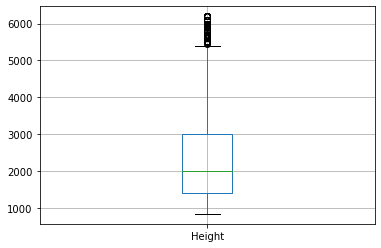

In [ ]:
#cách2: dùng zscore để loại bỏ giá trị ngoại lệ

data_height['zscore'] = (data_height - data_height.mean())/data_height.std()
print(data_height.head(5))
print(data_height[data_height['zscore']>3])
print(data_height[data_height['zscore']<0])
print("_______________________________________")

data_no_outlies2 = data_height[(data_height.zscore<3) & (data_height.zscore>0)]
print(data_no_outlies2)
boxplot = data_no_outlies2.boxplot(column = ['Height'])
print(boxplot)

Câu 6: Thực hiện lại câu 3 – 4 với tập dữ liệu sau khi đã loại bỏ ngoại lệ.

In [ ]:
print('Phương sai: ', data_no_outlies2['Height'].var())
print('Độ lệch chuẩn: ', data_no_outlies2['Height'].std())
print('Giá trị trung bình: ', data_no_outlies2['Height'].median())
print('Giá trị lớn nhất: ', data_no_outlies2['Height'].max())
print('Giá trị nhỏ nhất: ', data_no_outlies2['Height'].min())

Phương sai:  1920242.552645415
Độ lệch chuẩn:  1385.7281669380236
Giá trị trung bình:  2000.0
Giá trị lớn nhất:  6200.0
Giá trị nhỏ nhất:  840.0


Câu 7: Hãy tính độ tương quan (correlation) giữa các cột định lượng. (Hay xây dựng correlation
matrix)

In [ ]:
print(data1['Height'].corr(data1['Speed']))
print(data1.corr()) 

0.6722484644676717
          Height     Speed
Height  1.000000  0.672248
Speed   0.672248  1.000000


Câu 8: Từ correlation matrix, Hãy vẽ:
- Heat map (biểu đồ nhiệt)
- Pair plot (biểu đồ cặp)

In [ ]:
corr = data1.corr()
corr.style.background_gradient(cmap='bwr') #vẽ biểu đồ heat map (biểu đồ nhiệt)

,Height,Speed
Height,1.000000,0.672248
Speed,0.672248,1.000000


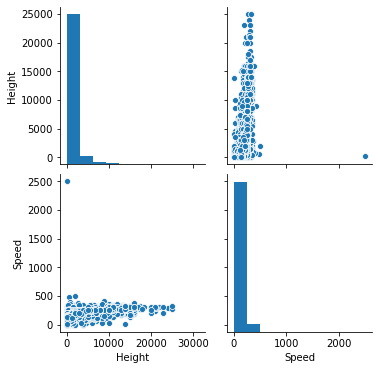

In [ ]:
sns.pairplot(data1) #biểu đồ pair plot (biểu đồ cặp)

Câu 9: Đối với các cột dữ liệu định tính, hãy:
- Vẽ biểu đồ cột dạng đứng
- Vẽ biểu đồ cột dạng ngang
- Vẽ biểu đồ đường tròn
- Vẽ biểu đồ Pareto

In [ ]:
print(data['Aircraft Damage'])
#print(data.index('Aircraft Damage'))
#row = data.iloc[:0] #lấy ra hàng 1 trong data
#print(row1)
#print(row1.index('Aircraft Damage'))
row = []
for i in data:
    row.append(i)
print(row)
print(row.index('Aircraft Damage')) #lấy ra vị trí cột aircraft damage
print(len(row)) #lấy ra vị trí cột cuối cùng trong data
data2 = data.iloc[:,range(36,66)]
print(data2)

0         1
1         0
2         0
3         0
4         0
         ..
174099    0
174100    0
174101    1
174102    0
174103    0
Name: Aircraft Damage, Length: 174104, dtype: int64
['Record ID', 'Incident Year', 'Incident Month', 'Incident Day', 'Operator ID', 'Operator', 'Aircraft', 'Aircraft Type', 'Aircraft Make', 'Aircraft Model', 'Aircraft Mass', 'Engine Make', 'Engine Model', 'Engines', 'Engine Type', 'Engine1 Position', 'Engine2 Position', 'Engine3 Position', 'Engine4 Position', 'Airport ID', 'Airport', 'State', 'FAA Region', 'Warning Issued', 'Flight Phase', 'Visibility', 'Precipitation', 'Height', 'Speed', 'Distance', 'Species ID', 'Species Name', 'Species Quantity', 'Flight Impact', 'Fatalities', 'Injuries', 'Aircraft Damage', 'Radome Strike', 'Radome Damage', 'Windshield Strike', 'Windshield Damage', 'Nose Strike', 'Nose Damage', 'Engine1 Strike', 'Engine1 Damage', 'Engine2 Strike', 'Engine2 Damage', 'Engine3 Strike', 'Engine3 Damage', 'Engine4 Strike', 'Engine4 Damage', 

       Aircraft Type  Height
1                  A     0.0
3                  A   200.0
4                  A   100.0
5                  A     0.0
10                 A    60.0
...              ...     ...
174097             A     0.0
174098             A  2000.0
174100             A  5000.0
174101             A  3000.0
174102             A  6000.0

[100635 rows x 2 columns]
       Aircraft Type  Height
42                 B    50.0
87                 B     0.0
299                B   650.0
377                B   800.0
691                B     0.0
...              ...     ...
173935             B    10.0
173985             B  1500.0
174030             B   900.0
174052             B    10.0
174095             B  1300.0

[1789 rows x 2 columns]
50.0 900.0
                min_height  median_height  max_height
AircraftType_A         0.0           50.0     31300.0
AircraftType_B         0.0          900.0      8500.0


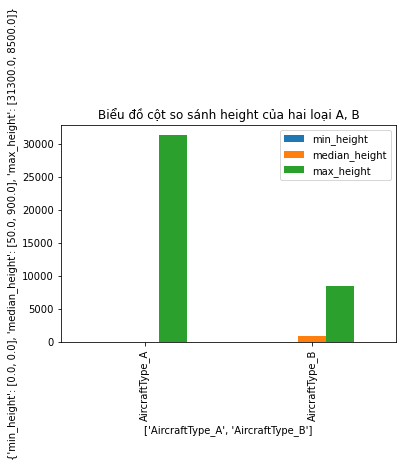

In [ ]:
#biểu đồ dạng đứng (bar)

aircraft_type_A = data[(data['Aircraft Type'] == 'A')]
data_aircraft_type_A = pd.DataFrame(columns = ['Aircraft Type', 'Height'], data=aircraft_type_A)
data_aircraft_type_A = data_aircraft_type_A.dropna() #loại bỏ các giá trị NA

aircraft_type_B = data[(data['Aircraft Type'] == 'B')]
data_aircraft_type_B = pd.DataFrame(columns = ['Aircraft Type', 'Height'],data=aircraft_type_B)
data_aircraft_type_B = data_aircraft_type_B.dropna() #loại bỏ các giá trị NA

print(data_aircraft_type_A)
print(data_aircraft_type_B)

print(data_aircraft_type_A['Height'].median(), data_aircraft_type_B['Height'].median())

Aircraft_Type = ['AircraftType_A', 'AircraftType_B']
height = {'min_height': [data_aircraft_type_A['Height'].min(), data_aircraft_type_B['Height'].min()],
          'median_height': [data_aircraft_type_A['Height'].median(), data_aircraft_type_B['Height'].median()],
          'max_height': [data_aircraft_type_A['Height'].max(), data_aircraft_type_B['Height'].max()]}

df = pd.DataFrame(height, index = Aircraft_Type)
print(df)

#vẽ biểu đồ dựa trên dataframe
#https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

df.plot(kind="bar") #kind: loại biểu đồ
plt.title('Biểu đồ cột so sánh height của hai loại A, B')
plt.xlabel(Aircraft_Type)
plt.ylabel(height)
plt.show()

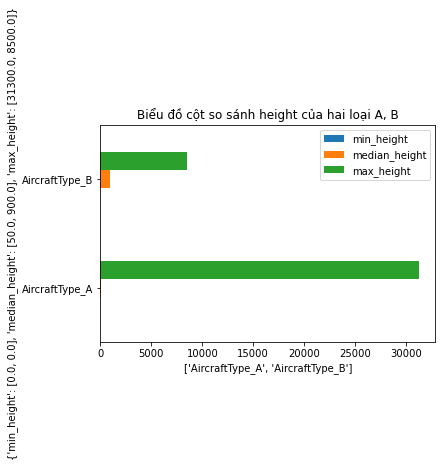

In [ ]:
#biểu đồ dạng ngang (barh)

df.plot(kind="barh") #kind: loại biểu đồ
plt.title('Biểu đồ cột so sánh height của hai loại A, B')
plt.xlabel(Aircraft_Type)
plt.ylabel(height)
plt.show()

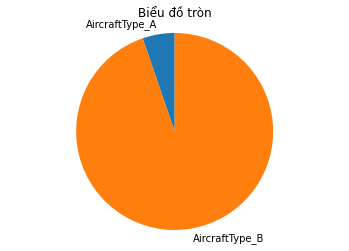

In [ ]:
#biểu đồ đường tròn

height_median = [data_aircraft_type_A['Height'].median(), data_aircraft_type_B['Height'].median()]

plt.pie(height_median, labels = Aircraft_Type, startangle = 90) #The startangle parameter is defined with an angle in degrees, default angle is 0
plt.title('Biểu đồ tròn')
plt.axis('equal')
plt.show()

[85.0, 130.0, 120.0, 140.0]
   median_speed
A          85.0
B         130.0
C         120.0
D         140.0
   median_speed     cumperc
D         140.0   29.473684
B         130.0   56.842105
C         120.0   82.105263
A          85.0  100.000000


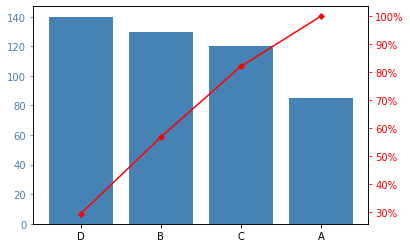

In [ ]:
#vẽ biểu đồ pareto

#giấ trị trung bình tốc độ của từng loại động cơ để xem máy bay xài động cơ nào ở tốc độ bao nhiêu thì nguy cơ xảy ra tai nạn cao nhất

engine_type = ['A', 'B', 'C', 'D']
median_speed = []

for i in engine_type:
    e_t = data[(data['Engine Type'] == i)]
    data_e_t = pd.DataFrame(columns = ['Engine Type', 'Speed'], data=e_t)
    data_e_t = data_e_t.dropna() #loại bỏ các giá trị NA
    median_speed.append(data_e_t['Speed'].median())
print(median_speed)

df = pd.DataFrame({'median_speed': median_speed}, index=engine_type)
print(df)

#sắp xếp cột median speed trong data theo thứ tự giảm dần
df = df.sort_values(by = 'median_speed', ascending = False) #ascending: cách thức sắp xếp mặc định là True (tăng dần)

#thêm cột và tính giá trị phần trăm tích lũy (Cumulative percentage)
df['cumperc'] = df['median_speed'].cumsum()/df['median_speed'].sum()*100 #cumsum () được sử dụng khi chúng ta muốn tính tổng tích lũy của các phần tử mảng trên một trục nhất định.

print(df)

#vẽ biểu đồ pareto

#kích thước, màu cho biểu đồ
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#tạo khung
fig, ax = plt.subplots()
ax.bar(df.index, df['median_speed'], color=color1)

ax2 = ax.twinx()
ax2.plot(df.index, df['cumperc'], marker='D', color=color2, ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

plt.show()

In [ ]:
#print(data[:36])
b = data.iloc[:,range(36,66)]
print(type(b))

<class 'pandas.core.frame.DataFrame'>
